In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from rich.table import Table
from rich import print as rptint


### 读取数据

In [2]:

scenario_name = "CWE-89-SQL-injection"

save_file_path = os.path.join('K:/hids/LID-DS-master/tools/out', scenario_name)
if  os.path.exists(save_file_path) is not True:
    print('path %s not exist' % save_file_path)

with open(os.path.join(save_file_path, 'train_syscall_num'),'r') as f:
    train_syscall_num = json.load(f)
    
with open(os.path.join(save_file_path, 'test_syscall_num'),'r') as f:
    test_syscall_num = json.load(f)
    
with open(os.path.join(save_file_path, 'val_syscall_num'),'r') as f:
    val_syscall_num = json.load(f)

with open(os.path.join(save_file_path, 'test_sc_num_nor_attack'),'r') as f:
    test_sc_num_nor_attack = json.load(f)

In [4]:
NORMAL = 'NORMAL'
NORMAL_AND_ATTACK = 'NORMAL_AND_ATTACK'
ATTACK = 'ATTACK'
IDLE = 'IDLE'

统计表

In [5]:
output_table = Table(title='System Call Number Statistics')
output_table.add_column("DIR", style="magenta")
output_table.add_column("NORMAL", style="magenta")
output_table.add_column("NORMAL_AND_ATTACK", style="magenta")
output_table.add_column("ATTACK", style="magenta")
output_table.add_column("IDLE", style="magenta")

output_table.add_row('Trainning', str(len(train_syscall_num[NORMAL])), str(len(train_syscall_num[NORMAL_AND_ATTACK])),
                     str(len(train_syscall_num[ATTACK])), str(len(train_syscall_num[IDLE])))
output_table.add_row('Validation', str(len(val_syscall_num[NORMAL])), str(len(val_syscall_num[NORMAL_AND_ATTACK])),
                     str(len(val_syscall_num[ATTACK])), str(len(val_syscall_num[IDLE])))
output_table.add_row('Test', str(len(test_syscall_num[NORMAL])), str(len(test_syscall_num[NORMAL_AND_ATTACK])),
                     str(len(test_syscall_num[ATTACK])), str(len(test_syscall_num[IDLE])))

rptint(output_table)

               System Call Number Statistics               
┏━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┓
┃ DIR        ┃ NORMAL ┃ NORMAL_AND_ATTACK ┃ ATTACK ┃ IDLE ┃
┡━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━┩
│ Trainning  │ 62     │ 0                 │ 0      │ 0    │
│ Validation │ 62     │ 0                 │ 0      │ 7    │
│ Test       │ 62     │ 65                │ 59     │ 8    │
└────────────┴────────┴───────────────────┴────────┴──────┘

### 1. 分析未见 syscall

In [5]:
normal_useen_sc = test_syscall_num[NORMAL].keys() - train_syscall_num[NORMAL].keys()
attack_useen_sc = test_syscall_num[ATTACK].keys() - train_syscall_num[NORMAL].keys()
nor_attack_useen_sc = test_syscall_num[NORMAL_AND_ATTACK].keys() - train_syscall_num[NORMAL].keys()
# normal and attack un seen system call
nor_attack_useen_sc_forself = nor_attack_useen_sc - attack_useen_sc

#### 1.1 未见 SC 统计表

In [17]:
output_table = Table(title='System Call UnSeen Statistics')
output_table.add_column("Type", style="magenta")
output_table.add_column("UnSeen Num", style="magenta")

output_table.add_row('[white]Normal', str(len(normal_useen_sc)))
output_table.add_row('[white]Attack', str(len(attack_useen_sc)))
output_table.add_row('[white]Normal & Attack', str(len(nor_attack_useen_sc)))

rptint(output_table)

 System Call UnSeen Statistics  
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Type            ┃ UnSeen Num ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Normal          │ 0          │
│ Attack          │ 3          │
│ Normal & Attack │ 3          │
└─────────────────┴────────────┘

#### 1.2  未见 sc 占比图

normal_useen_sc 0, attack_useen_sc 3, nor_attack_useen_sc_forself 0


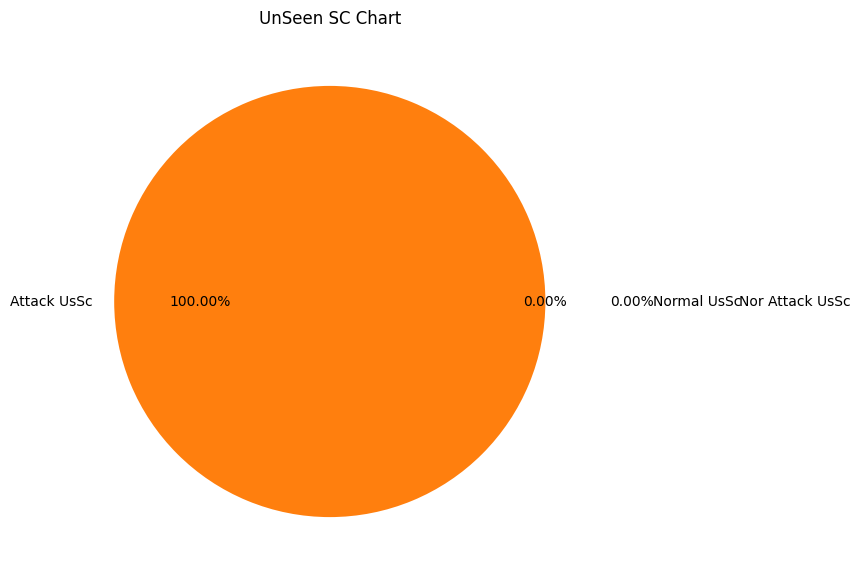

In [9]:
labels=['Normal UsSc', 'Attack UsSc', 'Nor Attack UsSc']
print(f'normal_useen_sc {len(normal_useen_sc)}, attack_useen_sc {len(attack_useen_sc)}, nor_attack_useen_sc_forself {len(nor_attack_useen_sc_forself)}')
data=[len(normal_useen_sc), len(attack_useen_sc), len(nor_attack_useen_sc_forself)]

fig = plt.figure(figsize=(7,7))
plt.pie(data,labels=labels,autopct='%1.2f%%', explode=(0.4, 0, 0.8))
plt.title("UnSeen SC Chart")
plt.show()
# plt.savefig("PieChart.jpg")

#### 1.3  Noremal 与 Attack 详细区分 (Test)

详细区分 Normal 与 Attack， 比较 Useen Syscall 中，是否有不存在 Useen Syscall 中的  syscall 的数量

In [11]:
labels=['Normal UsSc', 'Attack UsSc']
print(attack_useen_sc)
test_normal_useen =  attack_useen_sc - test_sc_num_nor_attack[NORMAL].keys()
test_attack_useen =  attack_useen_sc - test_sc_num_nor_attack[ATTACK].keys()

print(f'More detailed statistics, test_normal_useen {len(test_normal_useen)}, test_attack_useen {len(test_attack_useen)}')
data=[len(test_normal_useen), len(test_attack_useen)]

if data[0] != 0 or data[1] != 0:
    fig = plt.figure(figsize=(7,7))
    plt.pie(data,labels=labels,autopct='%1.2f%%')
    plt.title("Test UnSeen SC Chart")
    plt.show()
else:
    print('Test More detailed statistics, normal and attack all has unseen syscall.')

{'getdents', 'openat', 'unlink'}
More detailed statistics, test_normal_useen 0, test_attack_useen 0
Test More detailed statistics, normal and attack all has unseen syscall.


In [18]:
output_table = Table(title='Test System Call UnSeen Statistics')
output_table.add_column("Type", style="magenta")
output_table.add_column("UnSeen Num", style="magenta")

output_table.add_row('[white]Normal', str(len(test_normal_useen)))
output_table.add_row('[white]Attack', str(len(test_attack_useen)))

rptint(output_table)

Test System Call UnSeen
      Statistics       
┏━━━━━━━━┳━━━━━━━━━━━━┓
┃ Type   ┃ UnSeen Num ┃
┡━━━━━━━━╇━━━━━━━━━━━━┩
│ Normal │ 0          │
│ Attack │ 0          │
└────────┴────────────┘

### 2. 分析未用 syscall

相比较与正常，异常中，未使用的 syscall 特征分析

In [23]:

normal_used_sc = train_syscall_num[NORMAL].keys() - test_syscall_num[NORMAL].keys()
attack_used_sc = train_syscall_num[NORMAL].keys() - test_syscall_num[ATTACK].keys()
nor_attack_used_sc = train_syscall_num[NORMAL].keys() - test_syscall_num[NORMAL_AND_ATTACK].keys()

# Test未用的 syscall
test_normal_used = train_syscall_num[NORMAL].keys() - test_sc_num_nor_attack[NORMAL].keys()
test_attack_used = train_syscall_num[NORMAL].keys() - test_sc_num_nor_attack[ATTACK].keys()

# 打印结果
output_table = Table(title='System Call UnUsed Statistics')
output_table.add_column("Type", style="magenta")
output_table.add_column("UnUsed SC Num", style="magenta")

output_table.add_row('[white]Normal', str(len(normal_used_sc)))
output_table.add_row('[white]Attack', str(len(attack_used_sc)))
output_table.add_row('[white]Normal & Attack', str(len(nor_attack_used_sc)))
output_table.add_row('[white]TestO Normal', str(len(test_normal_used)))
output_table.add_row('[white]TestO Attack', str(len(test_attack_used)))

rptint(output_table)

# print(f'More detailed statistics, test_normal_used {len(test_normal_used)}, test_attack_used {len(test_attack_used)}')

   System Call UnUsed Statistics   
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Type            ┃ UnUsed SC Num ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Normal          │ 0             │
│ Attack          │ 6             │
│ Normal & Attack │ 0             │
│ TestO Normal    │ 0             │
│ TestO Attack    │ 6             │
└─────────────────┴───────────────┘

上表表明，attack 序列中，有没有使用的 syscall

### 3. 系统调用频率分析

系统调用交集，频率占比， 系统调用次数 / 总数
Normal and test 在同一折线图上进行比较

#### 3.1 类型为单位进行分析

In [25]:
# 交集
normal_seen_sc = test_syscall_num[NORMAL].keys() & train_syscall_num[NORMAL].keys()
attack_seen_sc = test_syscall_num[ATTACK].keys() & train_syscall_num[NORMAL].keys()
nor_attack_seen_sc = test_syscall_num[NORMAL_AND_ATTACK].keys() & train_syscall_num[NORMAL].keys()
# print(f'normal_seen_sc {len(normal_seen_sc)}, attack_seen_sc {len(attack_seen_sc)}, nor_attack_seen_sc {len(nor_attack_seen_sc)}')

# 打印结果
output_table = Table(title='SC Call Intersection')
output_table.add_column("Test", style="magenta")
output_table.add_column("Train", style="magenta")
output_table.add_column("Seen SC Num", style="magenta")

output_table.add_row('[white]Normal', '[white]Normal', str(len(normal_seen_sc)))
output_table.add_row('[white]Attack', '[white]Normal', str(len(attack_seen_sc)))
output_table.add_row('[white]Normal & Attack', '[white]Normal', str(len(nor_attack_seen_sc)))

rptint(output_table)

# 折线图横坐标，所有类型都见过的 syscall
x_data_labels=normal_seen_sc & attack_seen_sc & nor_attack_seen_sc
print('Finally x_data_labels %d' %len(x_data_labels))

Finally x_data_labels 56


           SC Call Intersection           
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Test            ┃ Train  ┃ Seen SC Num ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━┩
│ Normal          │ Normal │ 62          │
│ Attack          │ Normal │ 56          │
│ Normal & Attack │ Normal │ 62          │
└─────────────────┴────────┴─────────────┘

根据选出来的共同的 syscall, 提取 Train[Normal] Test[Normal] Test[ATTACK] Test[NORMAL_AND_ATTACK] 中的调用次数

In [34]:
x_axis_data=[i for i in range(len(x_data_labels))]

train_normal_dict={k:train_syscall_num[NORMAL][k]  for k in x_data_labels}
test_normal_dict={k:test_syscall_num[NORMAL][k]  for k in x_data_labels}
test_attack_dict={k:test_syscall_num[ATTACK][k]  for k in x_data_labels}
test_nor_attack_dict={k:test_syscall_num[NORMAL_AND_ATTACK][k]  for k in x_data_labels}

根据 X 轴指定 key的顺序，计算 y 的频率， Xi / sum

In [35]:

# 打印结果
output_table = Table(title='SC Call Sum')
output_table.add_column("Type", style="magenta")
output_table.add_column("SUM", style="magenta")

total = sum(train_normal_dict.values())
output_table.add_row('[white]Train Normal', str(total))
for key, val in train_normal_dict.items():
    train_normal_dict[key] = round(val/total * 100, 2)

total = sum(test_normal_dict.values())
output_table.add_row('[white]Test Normal', str(total))
for key, val in test_normal_dict.items():
    test_normal_dict[key] = round(val/total * 100, 2)

total = sum(test_attack_dict.values())
output_table.add_row('[white]Test Attack', str(total))
for key, val in test_attack_dict.items():
    test_attack_dict[key] = round(val/total * 100, 2)

total = sum(test_nor_attack_dict.values())
output_table.add_row('[white]Test Nor & Att', str(total))
for key, val in test_nor_attack_dict.items():
    test_nor_attack_dict[key] = round(val/total * 100, 2)

rptint(output_table)

        SC Call Sum         
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Type           ┃ SUM     ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Train Normal   │ 5516627 │
│ Test Normal    │ 3106197 │
│ Test Attack    │ 345312  │
│ Test Nor & Att │ 3123470 │
└────────────────┴─────────┘

计算 y 值，画整体折线图

In [36]:
train_normal_y=[train_normal_dict[k] for k in x_data_labels]
test_normal_y=[test_normal_dict[k] for k in x_data_labels]
test_attack_y=[test_attack_dict[k] for k in x_data_labels]
test_nor_attack_y=[test_nor_attack_dict[k] for k in x_data_labels]

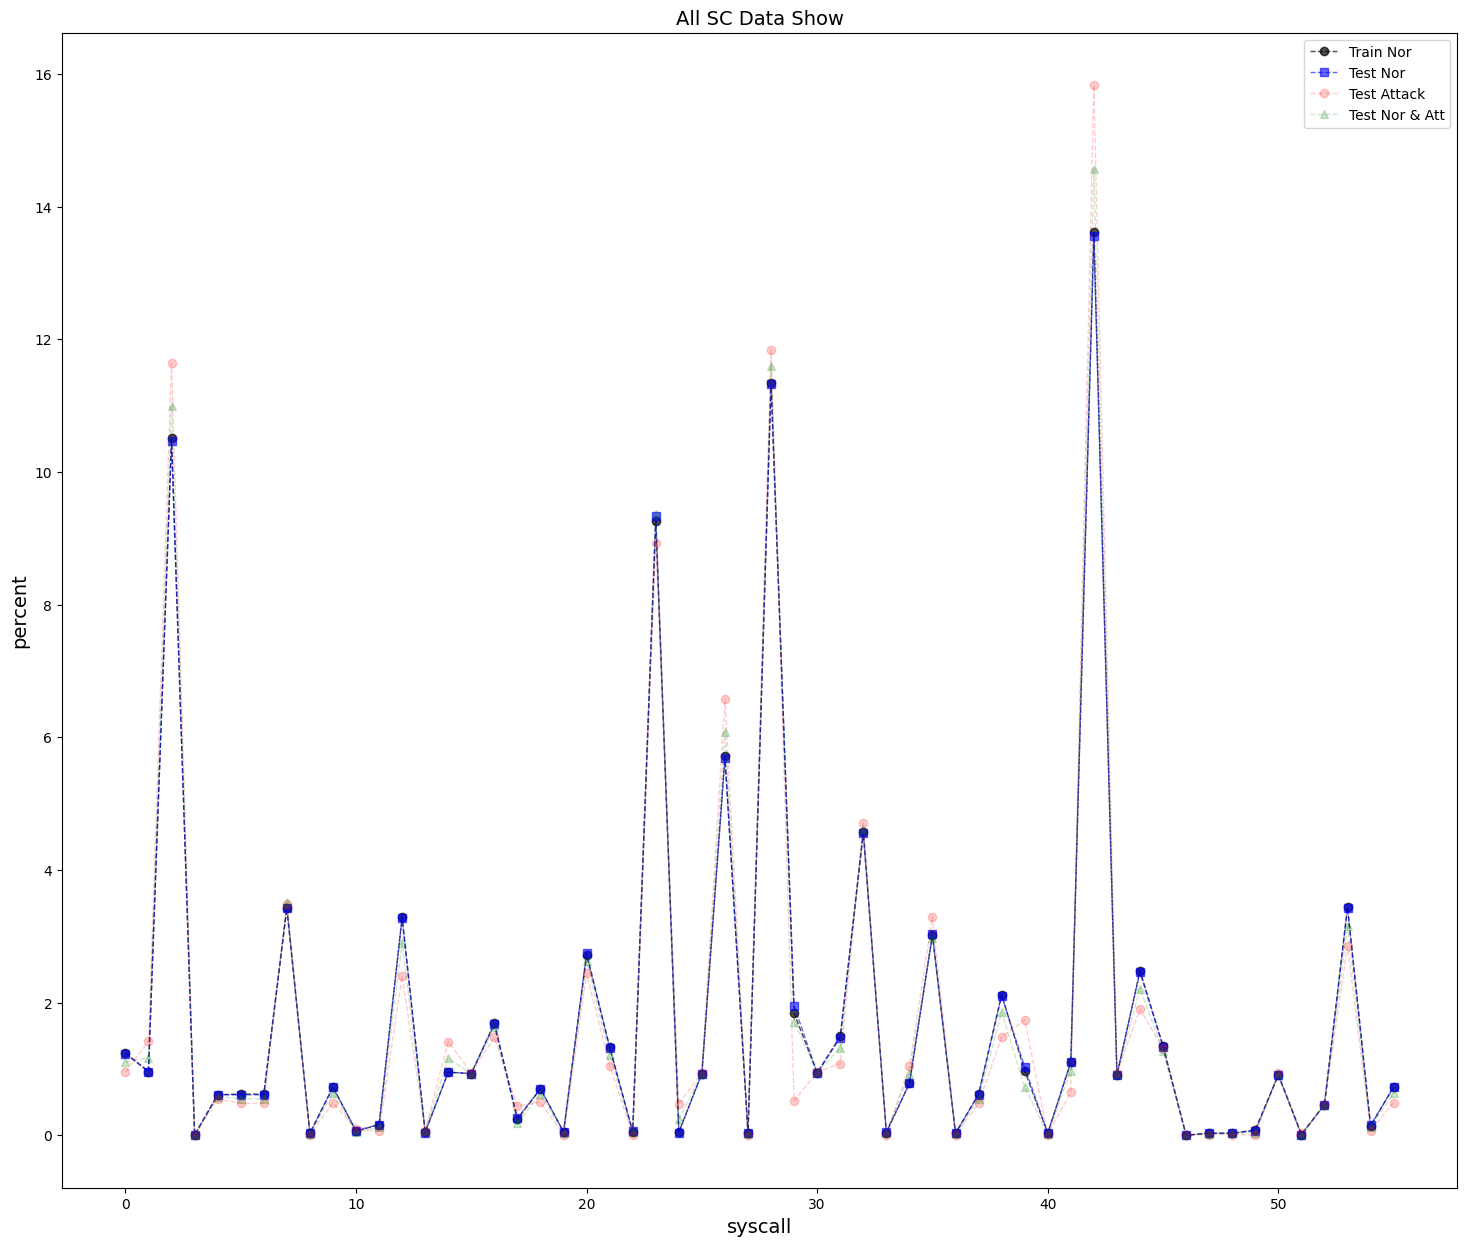

In [39]:
fig=plt.figure(figsize=(18,15))

plt.title("All SC Data Show", fontsize=14)
plt.plot(x_axis_data, train_normal_y,    'ko--', alpha=0.7, linewidth=1, label='Train Nor')
plt.plot(x_axis_data, test_normal_y,     'bs--', alpha=0.6, linewidth=1, label='Test Nor')
plt.plot(x_axis_data, test_attack_y,     'ro--', alpha=0.2, linewidth=1, label='Test Attack')
plt.plot(x_axis_data, test_nor_attack_y, 'g^--', alpha=0.2, linewidth=1, label='Test Nor & Att')
plt.legend()
plt.xlabel('syscall', fontsize=14)
plt.ylabel('percent', fontsize=14)
plt.savefig("./syscall_plot.jpg")

plt.show()

由上只，整体 attack 序列会有部分调用占比过高或者过低，整体趋势不变；
画两两比较折线图

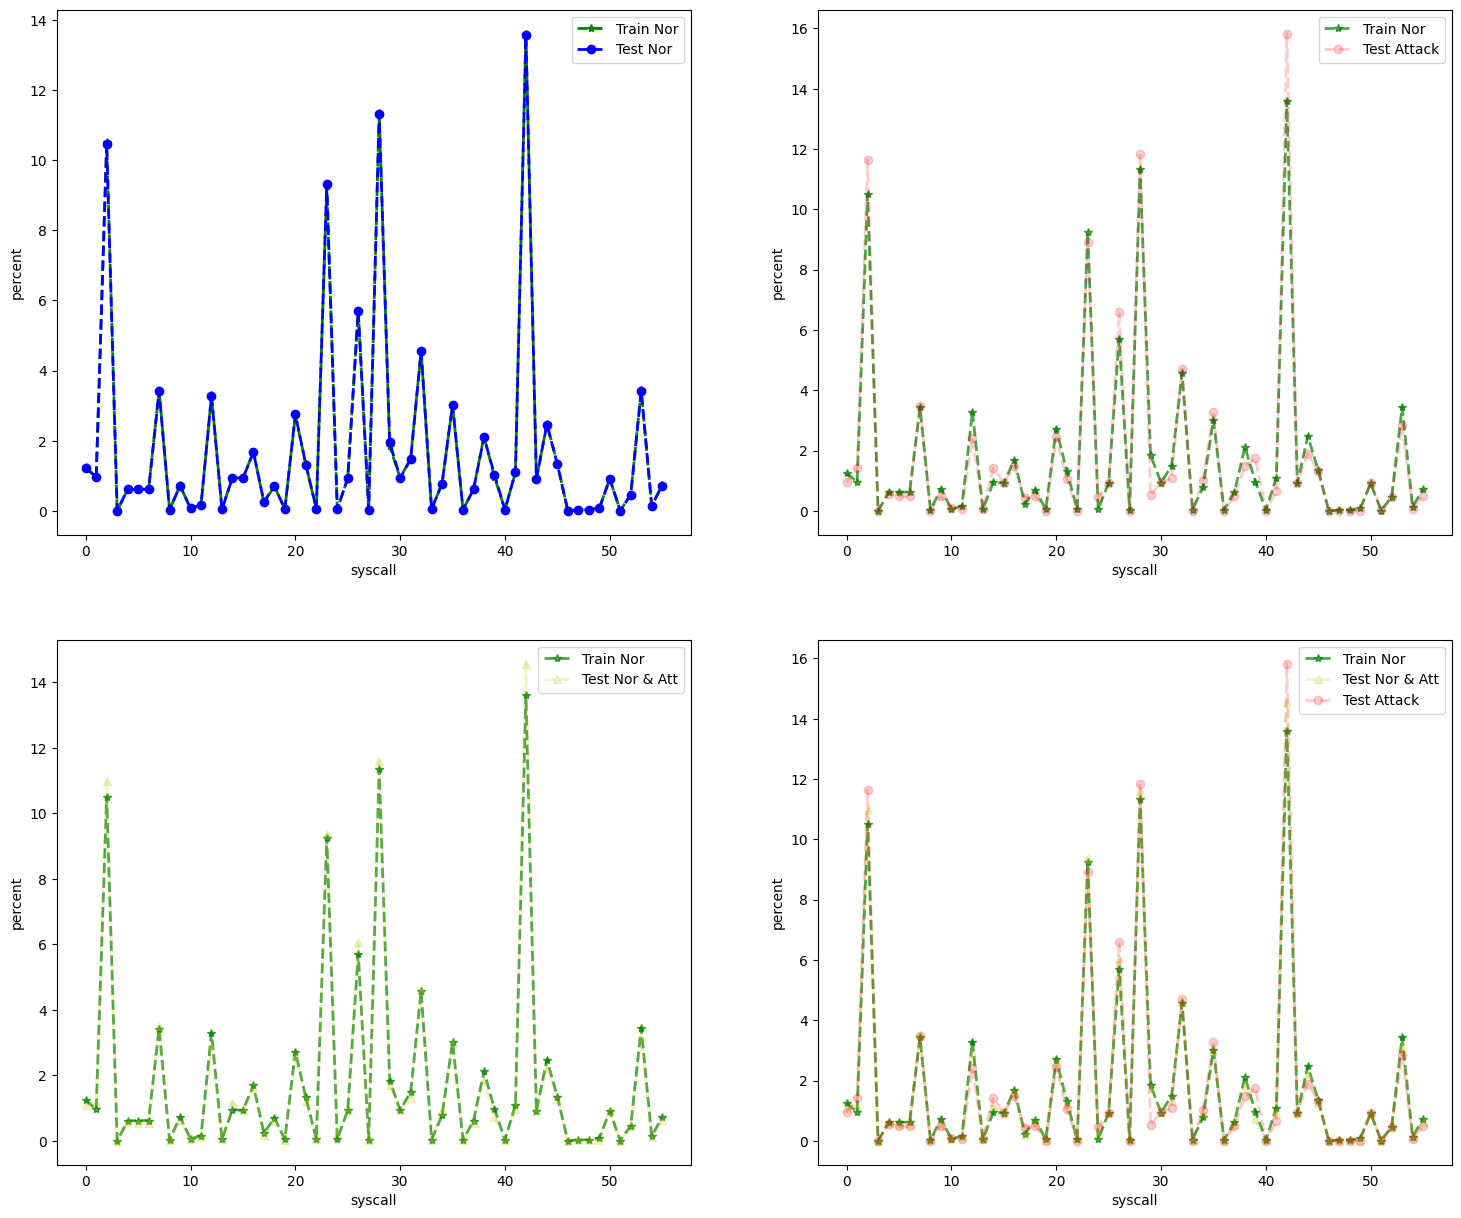

In [40]:
fig=plt.figure(figsize=(18,15))

# 1 Train Normal and Test Normal
plt.subplot(221)
plt.plot(x_axis_data, train_normal_y,    'g*--', linewidth=2, label='Train Nor')
plt.plot(x_axis_data, test_normal_y,     'bo--', linewidth=2, label='Test Nor')
plt.xlabel('syscall', fontsize=10)
plt.ylabel('percent', fontsize=10)
plt.legend()
# 2 Train Normal and Test Attack
plt.subplot(222)
plt.plot(x_axis_data, train_normal_y,    'g*--', alpha=0.7, linewidth=2, label='Train Nor')
plt.plot(x_axis_data, test_attack_y,     'ro--', alpha=0.2, linewidth=2, label='Test Attack')
plt.xlabel('syscall', fontsize=10)
plt.ylabel('percent', fontsize=10)
plt.legend()
# 3 Train Normal and Test Nor and attack
plt.subplot(223)
plt.plot(x_axis_data, train_normal_y,    'g*--', alpha=0.7, linewidth=2, label='Train Nor')
plt.plot(x_axis_data, test_nor_attack_y, 'y^--', alpha=0.2, linewidth=2, label='Test Nor & Att')
plt.xlabel('syscall', fontsize=10)
plt.ylabel('percent', fontsize=10)
plt.legend()
# 4 Train Normal and Test Attack and Nor & Attack
plt.subplot(224)
plt.plot(x_axis_data, train_normal_y,    'g*--', alpha=0.7, linewidth=2, label='Train Nor')
plt.plot(x_axis_data, test_nor_attack_y, 'y^--', alpha=0.2, linewidth=2, label='Test Nor & Att')
plt.plot(x_axis_data, test_attack_y,     'ro--', alpha=0.2, linewidth=2, label='Test Attack')
plt.xlabel('syscall', fontsize=10)
plt.ylabel('percent', fontsize=10)

plt.legend()
plt.savefig('./syscall_each.png')
plt.show()


#### 3.2 Noremal 与 Attack 详细区分 (Test)

对于 attack 与 normal, 根据入侵时间区分，查看 syscall 调用频率与 train normal 的区别
为便于比较，使用如上 x_data_labels 作为横坐标，但是 Test 中不一定包含所有 x_data_labels 系统调用

In [46]:
output_table = Table(title='TestO SC Call Sum')
output_table.add_column("Type", style="magenta")
output_table.add_column("SUM", style="magenta")

just_test_nor_dict={k:test_sc_num_nor_attack[NORMAL][k] if k in test_sc_num_nor_attack[NORMAL].keys() else 0  for k in x_data_labels}
just_test_attack_dict={k:test_sc_num_nor_attack[ATTACK][k] if k in test_sc_num_nor_attack[ATTACK].keys() else 0 for k in x_data_labels}

total = sum(just_test_nor_dict.values())
output_table.add_row('[white]Normal', str(total))
for key, val in just_test_nor_dict.items():
    just_test_nor_dict[key] = round(val/total * 100, 2)

total = sum(just_test_attack_dict.values())
output_table.add_row('[white]Attack', str(total))
for key, val in just_test_attack_dict.items():
    just_test_attack_dict[key] = round(val/total * 100, 2)

rptint(output_table)

 TestO SC Call Sum  
┏━━━━━━━━┳━━━━━━━━━┓
┃ Type   ┃ SUM     ┃
┡━━━━━━━━╇━━━━━━━━━┩
│ Normal │ 4194748 │
│ Attack │ 1080199 │
└────────┴─────────┘

给出折线图，三种一起比较

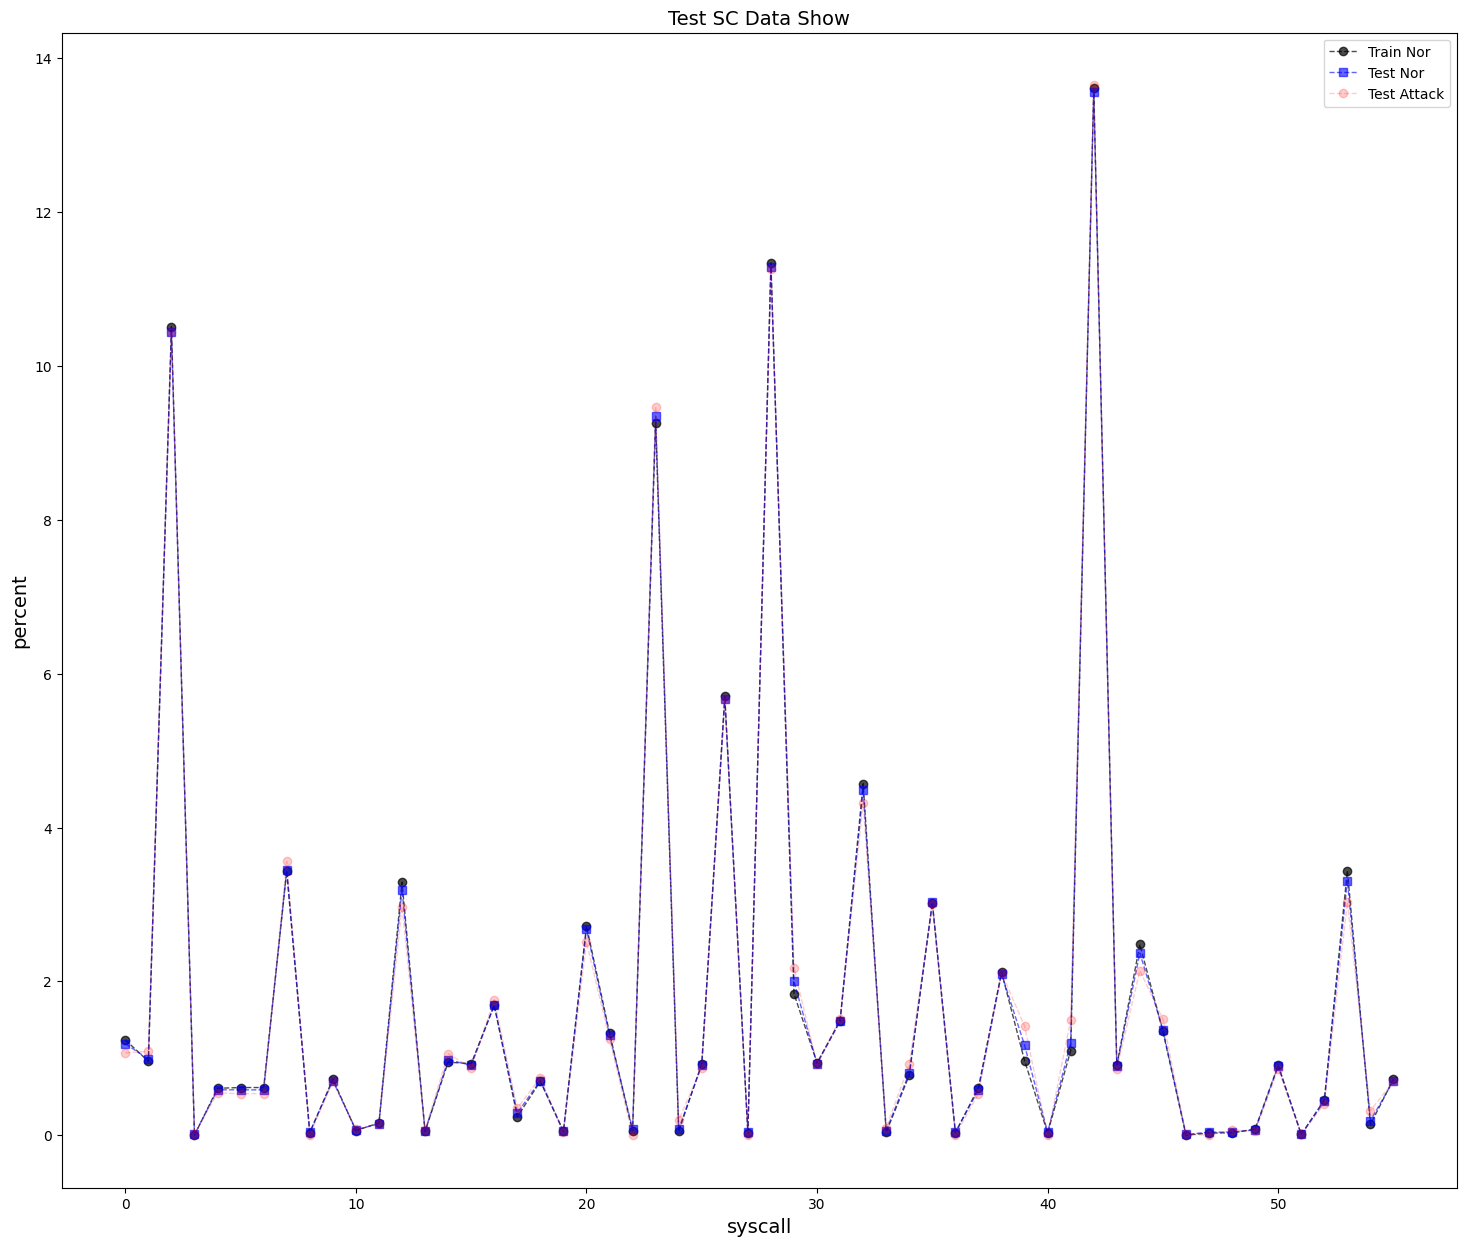

In [47]:
train_normal_y=[train_normal_dict[k] for k in x_data_labels]
testO_normal_y=[just_test_nor_dict[k] for k in x_data_labels]
testO_attack_y=[just_test_attack_dict[k] for k in x_data_labels]

fig=plt.figure(figsize=(18,15))

plt.title("Test SC Data Show", fontsize=14)
plt.plot(x_axis_data, train_normal_y,    'ko--', alpha=0.7, linewidth=1, label='Train Nor')
plt.plot(x_axis_data, testO_normal_y,     'bs--', alpha=0.6, linewidth=1, label='Test Nor')
plt.plot(x_axis_data, testO_attack_y,     'ro--', alpha=0.2, linewidth=1, label='Test Attack')
plt.legend()
plt.xlabel('syscall', fontsize=14)
plt.ylabel('percent', fontsize=14)
plt.savefig("./testO_syscall_plot.jpg")

plt.show()

由上图知，Test中， 根据入侵时间区分出的 normal， 系统调用频率与 Train Normal 也略有不同。